作业原地址：[https://blog.csdn.net/u013733326/article/details/79971488](https://blog.csdn.net/u013733326/article/details/79971488)

In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.python.framework import ops
import tf_utils
import time

np.random.seed(1)

In [2]:
y_hat = tf.constant(36, name='y_hat')
y = tf.constant(39, name='y')

loss = tf.Variable((y - y_hat) ** 2, name='loss') # 为损失函数创建一个变量

init = tf.global_variables_initializer()  # 运行之后的初始化(ession.run(init))
                                          #损失变量将被初始化并准备计算
with tf.Session() as session: # 创建一个session并打印输出
    session.run(init)
    print(session.run(loss))

9


In [3]:
a = tf.constant(2)
b = tf.constant(10)
c = tf.multiply(a, b)

print(c)

Tensor("Mul:0", shape=(), dtype=int32)


In [4]:
sess = tf.Session()
print(sess.run(c))

20


In [5]:
# 利用feed_dict来改变x的值

x = tf.placeholder(tf.int64, name='x')
print(sess.run(2 * x, feed_dict={x: 3}))
sess.close()
# 当我们第一次定义x时，我们不必为它指定一个值。 占位符只是一个变量，我们会在运行会话时将数据分配给它。

6


In [11]:
def linear_function():
    """
    实现一个线性功能：
        初始化W，类型为tensor的随机变量，维度为(4, 3)
        初始化X，类型为tensor的随机变量，维度为(3, 1)
        初始化b，类型为tensor的随机变量，维度为(4, 1)
    :return:
        result - 运行了session后的结果，运行的是Y=WX+b
    """

    np. random.seed(1) # 指定随机种子
    X = np.random.randn(3, 1)
    W = np.random.randn(4, 3)
    b = np.random.randn(4, 1)

    Y = tf.add(tf.matmul(W, X), b) # tf.matmul是矩阵乘法

    # 创建一个session并运行它
    sess = tf.Session()
    result = sess.run(Y)

    # session使用完毕，关闭它
    sess.close()

    return result

In [12]:
print("result = {}".format(linear_function()))

result = [[-2.15657382]
 [ 2.95891446]
 [-1.08926781]
 [-0.84538042]]


In [14]:
def sigmoid(z):
    """
    实现使用sigmoid函数计算z
    :param z: 输入的值，标量or矢量
    :return:
        result 用sigmoid计算z的值
    """
    # 创建一个占位符x，名字叫'x'
    x = tf.placeholder(tf.float32, name='x')

    # 计算sigmoid(z)
    sigmoid = tf.sigmoid(x)

    # 创建一个会话
    with tf.Session() as sess:
        result = sess.run(sigmoid, feed_dict={x: z})

    return result

In [15]:
print("sigmoid(0) = {}".format(sigmoid(0)))
print("sigmoid(12) = {}".format(sigmoid(12)))

sigmoid(0) = 0.5
sigmoid(12) = 0.9999938011169434


In [16]:
def one_hot_matrix(labels, C):
    """
    创建一个矩阵，其中第i行对应第i个类号，第j列对应第j个训练样本
    所以如果第j个样本对应着第i个标签，那么entry (i,j)将会是1
    :param labels: 标签向量
    :param C: 类别数
    :return:
        one_hot 独热矩阵
    """

    # 创建一个tf.constant，赋值为C，名字为C
    C = tf.constant(C, name='C')

    # 使用tf.one_hot，注意下axis
    one_hot_matrix = tf.one_hot(indices=labels, depth=C, axis=0)

    # 创建一个session
    with tf.Session() as sess:
        one_hot = sess.run(one_hot_matrix)

    return one_hot

In [17]:
labels = np.array([1, 2, 3, 0, 2, 1])
one_hot = one_hot_matrix(labels, C=4)
print(one_hot)

[[0. 0. 0. 1. 0. 0.]
 [1. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0.]]


In [18]:
def ones(shape):
    """
    创建一个维度为shape的变量，其值全为1
    :param shape: 你要创建的数组的维度
    :return:
        ones 只包含1的数组
    """

    # 使用tf.ones()
    ones = tf.ones(shape)

    # 创建会话
    with tf.Session() as sess:
        ones = sess.run(ones)

    return ones

In [20]:
print ("ones = {}".format(str(ones((3, 2)))))

ones = [[1. 1.]
 [1. 1.]
 [1. 1.]]


### 使用TensorFlow构建你的第一个神经网络
我们将会使用TensorFlow构建一个神经网络，需要记住的是实现模型需要做以下两个步骤：

 1. 创建计算图
 2. 运行计算图

In [21]:
# load dataset
X_train_orig, \
Y_train_orig, \
X_test_orig,\
Y_test_orig, \
classes = tf_utils.load_dataset()

Y = 0


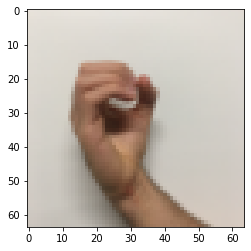

In [22]:
index = 66
plt.imshow(X_train_orig[index])
print('Y = {}'.format(np.squeeze(Y_train_orig[:, index])))

In [23]:
# flatten, normalization
X_train_flatten = X_train_orig.reshape(X_train_orig.shape[0], -1).T
X_test_flatten = X_test_orig.reshape(X_test_orig.shape[0], -1).T

# Normalization
X_train = X_train_flatten / 255
X_test = X_test_flatten / 255

# convert to one-hot
Y_train = tf_utils.convert_to_one_hot(Y_train_orig, C=6)
Y_test = tf_utils.convert_to_one_hot(Y_test_orig, C=6)

print("训练集样本数 = " + str(X_train.shape[1]))
print("测试集样本数 = " + str(X_test.shape[1]))
print("X_train.shape: " + str(X_train.shape))
print("Y_train.shape: " + str(Y_train.shape))
print("X_test.shape: " + str(X_test.shape))
print("Y_test.shape: " + str(Y_test.shape))

训练集样本数 = 1080
测试集样本数 = 120
X_train.shape: (12288, 1080)
Y_train.shape: (6, 1080)
X_test.shape: (12288, 120)
Y_test.shape: (6, 120)


In [24]:
def create_placeholders(n_x, n_y):
    """
    为TensorFlow会话创建占位符
    :param n_x: 一个实数，图片向量的大小（64*64*3 = 12288）
    :param n_y: 一个实数，分类数（从0到5，所以n_y = 6）
    :return:
        X - 一个数据输入的占位符，维度为[n_x, None]，dtype = "float"
        Y - 一个对应输入的标签的占位符，维度为[n_Y,None]，dtype = "float"

    提示：
        使用None，因为它让我们可以灵活处理占位符提供的样本数量。事实上，测试/训练期间的样本数量是不同的。
    """

    X = tf.placeholder(tf.float32, [n_x, None], name='X')
    Y = tf.placeholder(tf.float32, [n_y, None], name='Y')

    return X, Y

In [25]:
X, Y = create_placeholders(12288, 6)
print("X = {}".format(X))
print("Y = {}".format(Y))

X = Tensor("X_3:0", shape=(12288, ?), dtype=float32)
Y = Tensor("Y_1:0", shape=(6, ?), dtype=float32)


In [26]:
def initialize_parameters():
    """
    初始化神经网络的参数，参数的维度如下：
        W1 : [25, 12288]
        b1 : [25, 1]
        W2 : [12, 25]
        b2 : [12, 1]
        W3 : [6, 12]
        b3 : [6, 1]
    :return:
        parameters - 包含了W和b的字典
    """
    tf.set_random_seed(1) # random seed

    W1 = tf.get_variable("W1", [25, 12288], initializer=tf.initializers.glorot_uniform(seed=1))
    b1 = tf.get_variable("b1", [25, 1], initializer=tf.zeros_initializer())
    W2 = tf.get_variable("W2", [12, 25], initializer=tf.initializers.glorot_uniform(seed=1))
    b2 = tf.get_variable("b2", [12, 1], initializer=tf.zeros_initializer())
    W3 = tf.get_variable("W3", [6, 12], initializer=tf.initializers.glorot_uniform(seed=1))
    b3 = tf.get_variable("b3", [6, 1], initializer=tf.zeros_initializer())

    parameters = {
        "W1": W1,
        "b1": b1,
        "W2": W2,
        "b2": b2,
        "W3": W3,
        "b3": b3}

    return parameters

In [27]:
tf.reset_default_graph()  # 用于清除默认图形堆栈并重置全局默认图形。

with tf.Session() as sess:
    parameters = initialize_parameters()
    print("W1 = " + str(parameters["W1"]))
    print("b1 = " + str(parameters["b1"]))
    print("W2 = " + str(parameters["W2"]))
    print("b2 = " + str(parameters["b2"]))

W1 = <tf.Variable 'W1:0' shape=(25, 12288) dtype=float32_ref>
b1 = <tf.Variable 'b1:0' shape=(25, 1) dtype=float32_ref>
W2 = <tf.Variable 'W2:0' shape=(12, 25) dtype=float32_ref>
b2 = <tf.Variable 'b2:0' shape=(12, 1) dtype=float32_ref>


In [28]:
def forward_propagation(X, parameters):
    """
    实现一个模型的前向传播，模型结构为LINEAR -> RELU -> LINEAR -> RELU -> LINEAR -> SOFTMAX
    :param X: 输入数据的占位符，维度为（输入节点数量，样本数量）
    :param parameters: 包含了W和b的参数的字典
    :return:
        Z3 - 最后一个线性节点output
    """

    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    W3 = parameters['W3']
    b3 = parameters['b3']

    Z1 = tf.add(tf.matmul(W1, X), b1) # Z1 = np.dot(W1, X) + b1
    A1 = tf.nn.relu(Z1) # A1 = relu(Z1)
    Z2 = tf.add(tf.matmul(W2, A1), b2) # Z2 = np.dot(W2, a1) + b2
    A2 = tf.nn.relu(Z2) # A2 = relu(Z2)
    Z3 = tf.add(tf.matmul(W3, A2), b3) # Z3 = np.dot(W3,Z2) + b3

    return Z3

In [29]:
tf.reset_default_graph()

with tf.Session() as sess:
    X, Y = create_placeholders(12288, 6)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X, parameters)
    print('Z3 = {}'.format(Z3))

Z3 = Tensor("Add_2:0", shape=(6, ?), dtype=float32)


In [30]:
def compute_cost(Z3, Y):
    """
    计算成本
    :param Z3: 前向传播的结果
    :param Y:  标签，一个占位符，和Z3的维度相同
    :return:
        cost - 成本值
    """

    logits = tf.transpose(Z3) # 转置
    labels = tf.transpose(Y) # 转置
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=labels))

    return cost

In [31]:
tf.reset_default_graph()

with tf.Session() as sess:
    X, Y = create_placeholders(12288,6)
    parameters = initialize_parameters()
    Z3 = forward_propagation(X,parameters)
    cost = compute_cost(Z3,Y)
    print("cost = " + str(cost))

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See `tf.nn.softmax_cross_entropy_with_logits_v2`.

cost = Tensor("Mean:0", shape=(), dtype=float32)


In [32]:
def model(X_train, Y_train, X_test, Y_test,
          learning_rate=0.0001, num_epochs=1500, minibatch_size=32,
          print_cost=True, is_plot=True):
    """
    实现一个三层的TensorFlow神经网络：LINEAR->RELU->LINEAR->RELU->LINEAR->SOFTMAX
    :param X_train: 训练集，维度为（输入大小（输入节点数量）=12288，样本数量=1080）
    :param Y_train: 训练集分类数量，维度为（输出大小（输出节点数量）=6，样本数量=1080）
    :param X_test: 测试集，维度为（输入大小（输入节点数量）=12288，样本数量=120）
    :param Y_test: 测试集分类数量，维度为（输出大小（输出节点数量）=6，样本数量=120）
    :param learning_rate: 学习率
    :param num_epochs: 整个训练集的遍历次数
    :param minibatch_size: 每个小批量数据集的大小
    :param print_cost: 是否打印成本，每100代打印一次
    :param is_plot: 是否绘制曲线图
    :return:
        parameters - 学习后的参数
    """
    ops.reset_default_graph()  # 能够重新运行模型而不覆盖tf变量
    tf.set_random_seed(1)
    seed = 3
    (n_x, m) = X_train.shape  # 获取输入节点数量和样本数
    n_y = Y_train.shape[0]  # 获取输出节点数量
    costs = []  # 成本集

    # 给X & Y创建placeholder
    X, Y = create_placeholders(n_x, n_y)

    # 初始化参数
    parameters = initialize_parameters()

    # 前向传播
    Z3 = forward_propagation(X, parameters)

    # 计算成本
    cost = compute_cost(Z3, Y)

    # 反向传播，使用Adam优化
    optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

    # 初始化所有变量
    init = tf.global_variables_initializer()

    # 开始会话并计算
    with tf.Session() as session:
        # 初始化
        session.run(init)

        # training loop
        for epoch in range(num_epochs):
            epoch_cost = 0  # 每代的成本
            num_minibatches = int(m / minibatch_size)  # minibatch的总数量
            seed = seed + 1
            minibatches = tf_utils.random_mini_batches(X_train, Y_train,mini_batch_size=minibatch_size, seed=seed)

            for minibatch in minibatches:

                (minibatch_x, minibatch_y) = minibatch

                # 数据已经准备好了，开始运行session
                _, minibatch_cost = session.run([optimizer, cost], feed_dict={X:minibatch_x, Y:minibatch_y})

                # 计算这个minibatch在这一代中所占的误差
                epoch_cost = epoch_cost + minibatch_cost / num_minibatches

            # 记录并打印成本
            ## 记录成本
            if epoch % 5 == 0:
                costs.append(epoch_cost)
                # 是否打印
                if print_cost and epoch % 100 == 0:
                    print('epoch = {epoch}   epoch_cost = {epoch_cost}'.format(epoch=epoch, epoch_cost=epoch_cost))

        # 是否绘制
        if is_plot:
            plt.plot(np.squeeze(costs))
            plt.ylabel('cost')
            plt.xlabel('iterations (per tens)')
            plt.title('Learning rate = {}'.format(learning_rate))
            plt.show()

        # 保存学习后的参数
        parameters = session.run(parameters)
        print('参数已保存到session。')

        # 计算当前的预测结果
        correct_prediction = tf.equal(tf.argmax(Z3), tf.argmax(Y))

        # 计算准确率
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, 'float'))

        print('训练集の准确率： {}'.format(accuracy.eval({X: X_train, Y: Y_train})))
        print('测试集の准确率： {}'.format(accuracy.eval({X: X_test, Y: Y_test})))

        return parameters

F:\anaconda3\envs\tf1\lib\site-packages\ipykernel_launcher.py:2: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  
F:\anaconda3\envs\tf1\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  


epoch = 0   epoch_cost = 1.8557019089207503
epoch = 100   epoch_cost = 1.0164577455231638
epoch = 200   epoch_cost = 0.7331024155472262
epoch = 300   epoch_cost = 0.5729391032999213
epoch = 400   epoch_cost = 0.4687737985090776
epoch = 500   epoch_cost = 0.38101537299878674
epoch = 600   epoch_cost = 0.31382867152040655
epoch = 700   epoch_cost = 0.2541690735202846
epoch = 800   epoch_cost = 0.2038003718762687
epoch = 900   epoch_cost = 0.1664740659973838
epoch = 1000   epoch_cost = 0.14140813188119367
epoch = 1100   epoch_cost = 0.10760586708784105
epoch = 1200   epoch_cost = 0.08672963427097506
epoch = 1300   epoch_cost = 0.061015780845826324
epoch = 1400   epoch_cost = 0.05091105559558578
参数已保存到session。
训练集の准确率： 0.9990741014480591
测试集の准确率： 0.7250000238418579
CPU的执行时间 = 351.883565600001 秒


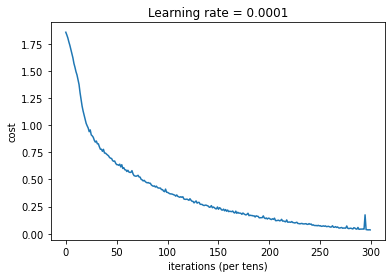

In [40]:
# start time
start_time = time.clock()
# start training
parameters = model(X_train, Y_train, X_test, Y_test)
# end time
end_time = time.clock()
# compute time consuming
print('CPU的执行时间 = {} 秒'.format(end_time - start_time))

In [ ]:
tf_utils.predict()